#### 1. Importing Libraries


In [121]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

#### 2. Loading and Exploring the Data

In [122]:
df = pd.read_csv('data/titanic.csv')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: xlabel='Sex', ylabel='Age'>

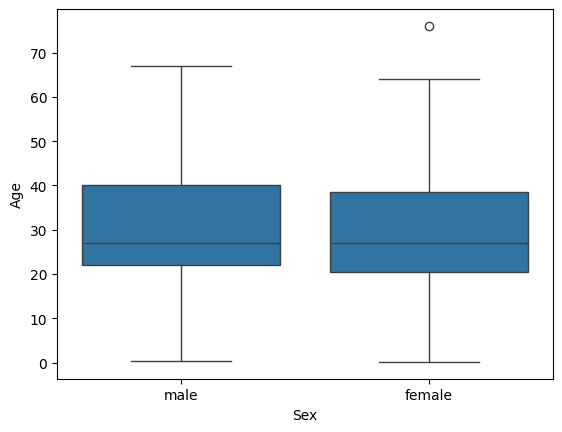

In [124]:
# age and fare have missing values
sns.boxplot(x=df['Sex'],y=df['Age'])

<Axes: xlabel='Pclass', ylabel='Fare'>

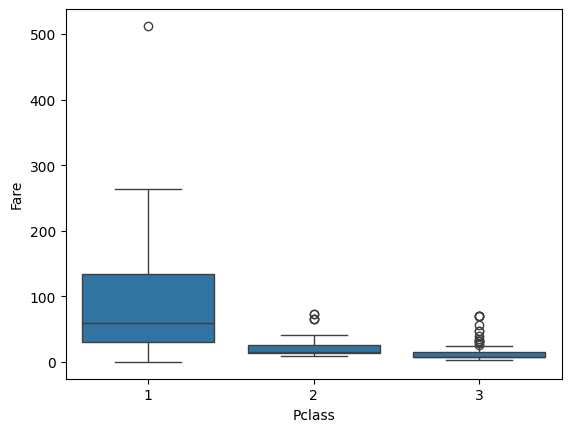

In [125]:
sns.boxplot(x=df['Pclass'],y=df['Fare'])

#### 3. Data Cleaning and Preparation

In [126]:
df.drop(columns=['Cabin','Name','PassengerId','Ticket'],inplace=True)

In [127]:
df.loc[df['Sex']=='male','Age'] = df[df['Sex']=='male']['Age'].fillna(df[df['Sex']=='male'].Age.median())
df.loc[df['Sex']=='female','Age'] = df[df['Sex']=='female']['Age'].fillna(df[df['Sex']=='female'].Age.median())

In [128]:
df.loc[df.isna().any(axis=1),'Fare'] = df['Fare'].median()

#### 4. Scaling or Normalizing Data


In [129]:
categories = [['female','male']]
encoder = OrdinalEncoder(categories=categories,handle_unknown='use_encoded_value',unknown_value=-1)

df['Sex'] = encoder.fit_transform(df['Sex'].values.reshape(-1,1))

labelencoder = LabelEncoder()
df['Embarked'] = labelencoder.fit_transform(df['Embarked'].values.reshape(-1,1))

c:\Users\Usuario\Documents\Proyectos\DMC\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 5. Model Building and Training


In [138]:
x = df.drop(columns='Survived')
y = df['Survived']

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [167]:
model = LogisticRegression(solver='sag',random_state=1,C=1,tol=0.0001)

model.fit(x_train,y_train)
predictions =model.predict(x_test)

c:\Users\Usuario\Documents\Proyectos\DMC\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### 6. Model Evaluation

In [168]:
confusion_matrix(y_test,predictions)

array([[64,  3],
       [31,  7]], dtype=int64)

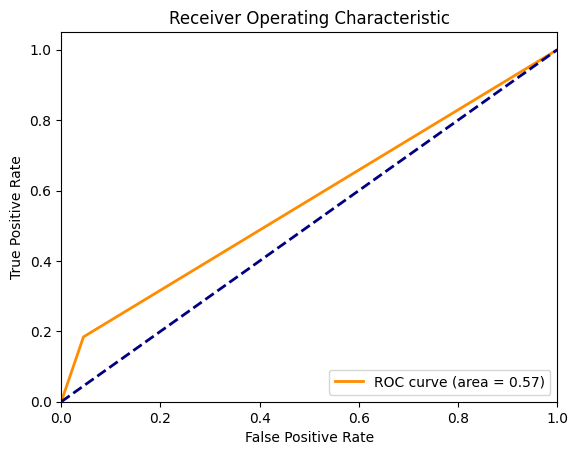

In [169]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asumiendo que tienes tus valores reales (y_test) y las probabilidades predichas del modelo (y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
